In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Параметры функции
T = 3  # Период
L = T / 2

# Определим переменную x
x = sp.symbols('x')

# Определим функцию f(x)
f_piecewise = sp.Piecewise((1 - x, (x >= 0) & (x < 2)), (1, (x >= 2) & (x <= 3)))

# Вычислим a0
a0 = (2 / T) * sp.integrate(f_piecewise, (x, 0, T))
a0 = sp.simplify(a0)

# Вычислим an и bn
def fourier_coefficients(n, L, f, T):
    a_n = (2 / T) * sp.integrate(f * sp.cos(2 * np.pi * n * x / T), (x, 0, T))
    b_n = (2 / T) * sp.integrate(f * sp.sin(2 * np.pi * n * x / T), (x, 0, T))
    return sp.simplify(a_n), sp.simplify(b_n)

# Преобразуем в символьные выражения
N = 10  # Число членов ряда Фурье для вычисления
a_n_list = []
b_n_list = []

for n in range(1, N + 1):
    a_n, b_n = fourier_coefficients(n, L, f_piecewise, T)
    a_n_list.append(a_n)
    b_n_list.append(b_n)

print(a0)
print(a_n_list)
print(b_n_list)

0.666666666666667
[0.779301558617052, -0.218671281912081, 2.72103743798262e-17, 0.152080515305152, -0.101146872556549, 2.60538920625084e-17, 0.0834137741050571, -0.0653540390652983, 2.60538920625084e-17, 0.0574126161741313]
[-0.186689807720132, -0.192059962707810, 0.212206590789194, -0.0713512166419692, -0.0689267803753042, 0.106103295394597, -0.0427867168331201, -0.0418452994989683, 0.0707355302630646, -0.0305147878337428]


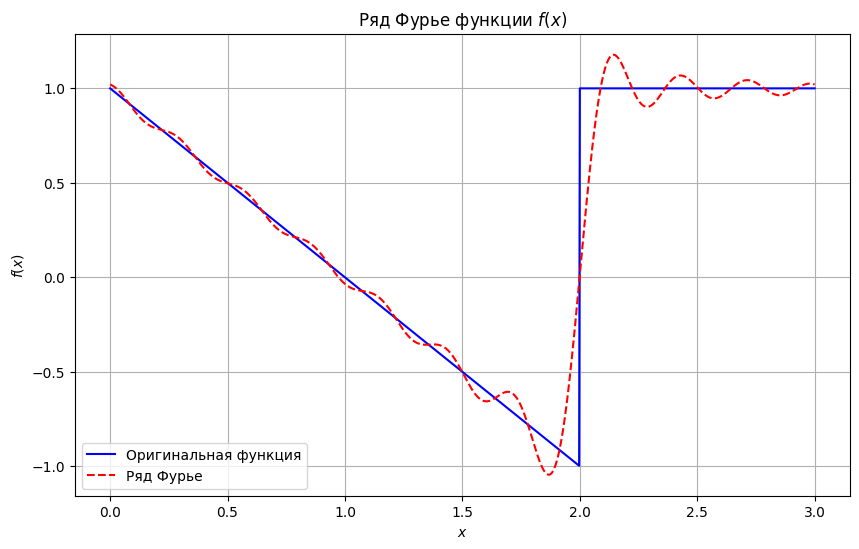

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Параметры
x = sp.symbols('x')
T = 3  # Период

# Функция
f = sp.Piecewise((1 - x, (x >= 0) & (x < 2)), (1, (x >= 2) & (x <= 3)))

# Коэффициенты Фурье
a0 = (2/T) * (sp.integrate(1 - x, (x, 0, 2)) + sp.integrate(1, (x, 2, 3)))
a0_val = a0.evalf()

# Коэффициенты a_n и b_n
n = sp.symbols('n', integer=True)
a_n = (2/T) * (sp.integrate((1 - x) * sp.cos(2 * sp.pi * n * x / T), (x, 0, 2)) + 
               sp.integrate(1 * sp.cos(2 * sp.pi * n * x / T), (x, 2, 3)))
b_n = (2/T) * (sp.integrate((1 - x) * sp.sin(2 * sp.pi * n * x / T), (x, 0, 2)) + 
               sp.integrate(1 * sp.sin(2 * sp.pi * n * x / T), (x, 2, 3)))

# Вычислим коэффициенты для первых нескольких гармоник
N = 10  # Число членов ряда Фурье для вычисления
a_n_vals = [a_n.subs(n, i).evalf() for i in range(1, N+1)]
b_n_vals = [b_n.subs(n, i).evalf() for i in range(1, N+1)]

# Функция для построения ряда Фурье
def fourier_series(x_val, a0, a_n_vals, b_n_vals, T, N):
    result = a0 / 2
    for n in range(1, N + 1):
        result += a_n_vals[n-1] * np.cos(2 * np.pi * n * x_val / T) + b_n_vals[n-1] * np.sin(2 * np.pi * n * x_val / T)
    return result

# Построение графика
x_vals = np.linspace(0, 3, 1000)
f_vals = [fourier_series(xi, a0_val, a_n_vals, b_n_vals, T, N) for xi in x_vals]

# Оригинальная функция
f_original = lambda x: 1 - x if x < 2 else 1
f_original_vals = [f_original(xi) for xi in x_vals]

# Построим график
plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_original_vals, label='Оригинальная функция', color='blue')
plt.plot(x_vals, f_vals, label='Ряд Фурье', color='red', linestyle='--')
plt.title('Ряд Фурье функции $f(x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)
plt.show()


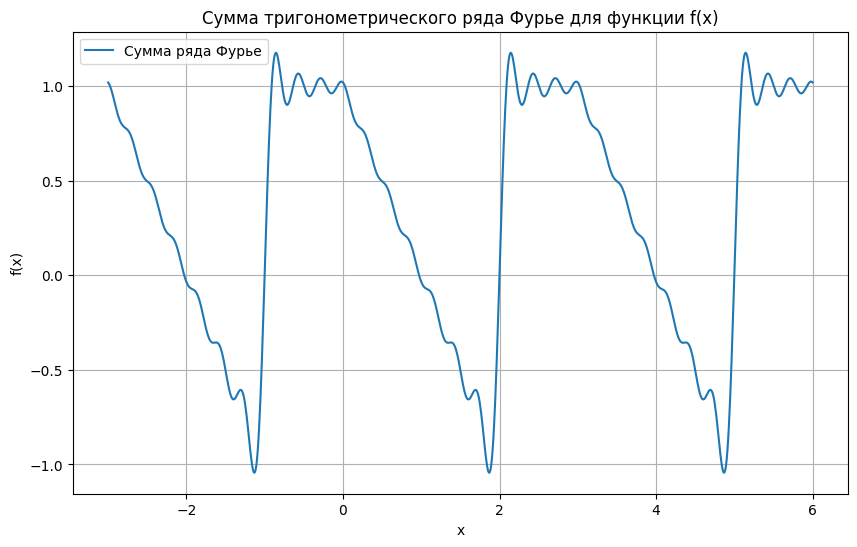

In [5]:

# Определяем функцию для суммы ряда Фурье
def fourier_series(x, a0, a_n_list, b_n_list, N, T):
    result = a0 / 2
    for n in range(1, N + 1):
        result += a_n_list[n-1] * np.cos(2 * np.pi * n * x / T) + b_n_list[n-1] * np.sin(2 * np.pi * n * x / T)
    return result

# Определяем диапазон x для построения графика
x_vals = np.linspace(-T, 2*T, 1000)
y_vals = []

# Вычисляем значения ряда Фурье в точках x_vals
for val in x_vals:
    y_vals.append(fourier_series(val, a0, a_n_list, b_n_list, N, T))

# Преобразуем список в массив для удобства
y_vals = np.array(y_vals, dtype=np.float64)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='Сумма ряда Фурье')
plt.title('Сумма тригонометрического ряда Фурье для функции f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


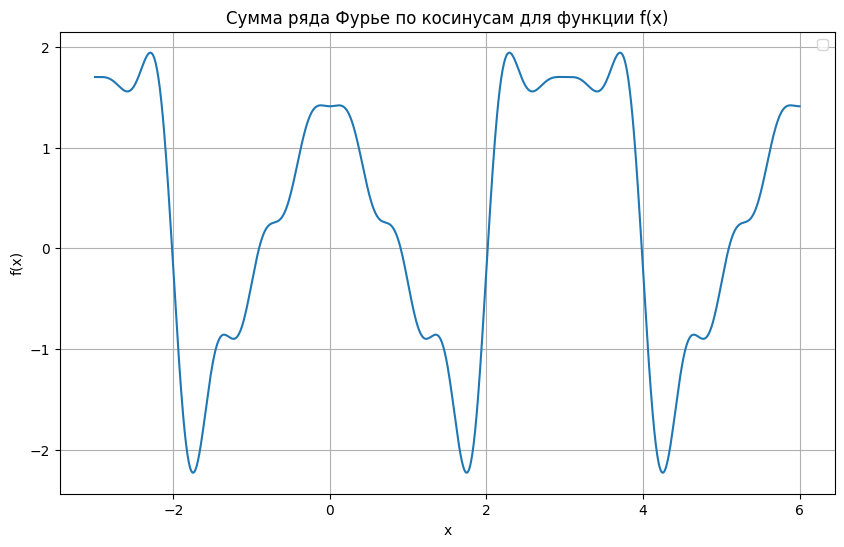

In [8]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Параметры функции
T = 3  # Период
L = T

# Определим переменную x
x = sp.symbols('x')

# Определим функцию f(x)
f_piecewise = sp.Piecewise((1 - x, (x >= 0) & (x < 2)), (1, (x >= 2) & (x < 3)))

# Определим кусочную функцию для четного продолжения
f_even_piecewise = sp.Piecewise((1 - abs(x), (abs(x) >= 0) & (abs(x) < 2)), (1, (abs(x) >= 2) & (abs(x) < 3)))

# Вычислим a0
a0_even = (1 / L) * sp.integrate(f_even_piecewise, (x, -L, L))
a0_even = sp.simplify(a0_even)

# Вычислим an для косинусного ряда Фурье
def cosine_coefficients(n, L, f):
    a_n = (2 / L) * sp.integrate(f * sp.cos(n * np.pi * x / L), (x, -L, L))
    return sp.simplify(a_n)

# Число членов ряда Фурье
N = 10
a_n_even_list = []

for n in range(1, N + 1):
    a_n = cosine_coefficients(n, L, f_even_piecewise)
    a_n_even_list.append(a_n)

# Определяем функцию для суммы косинусного ряда Фурье
def cosine_fourier_series(x, a0, a_n_list, N, L):
    result = a0 / 2
    for n in range(1, N + 1):
        result += a_n_list[n-1] * np.cos(n * np.pi * x / L)
    return result

# Определяем диапазон x для построения графика
x_vals = np.linspace(-3, 6, 1000)  # От -L до 2L
y_vals_even = []

# Вычисляем значения ряда Фурье в точках x_vals для четного продолжения
for val in x_vals:
    y_vals_even.append(cosine_fourier_series(val, a0_even, a_n_even_list, N, L))

y_vals_even = np.array(y_vals_even, dtype=np.float64)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals_even)
plt.title('Сумма ряда Фурье по косинусам для функции f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


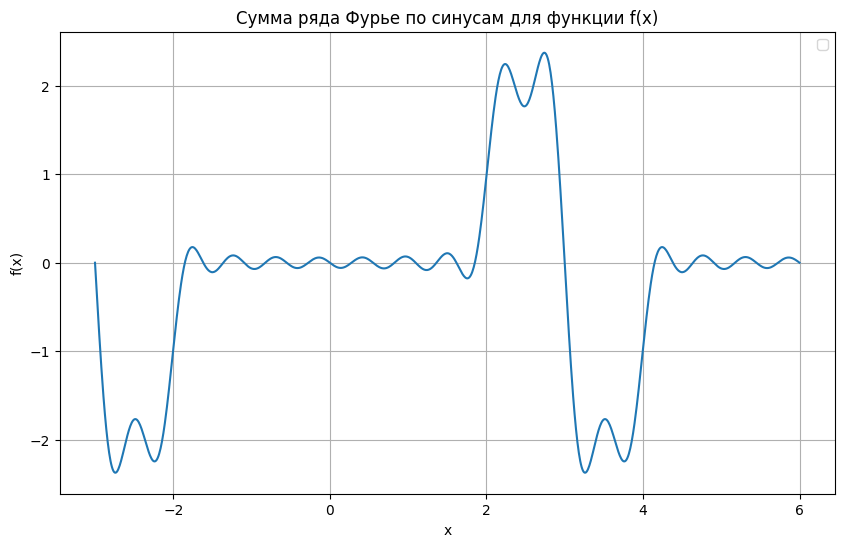

In [10]:
# Определим кусочную функцию для нечетного продолжения
f_odd_piecewise = sp.Piecewise((1 - x, (x >= 0) & (x < 2)), 
                               (1, (x >= 2) & (x < 3)),
                               (x + 1, (x >= -2) & (x < 0)), 
                               (-1, (x >= -3) & (x < -2)))

# Вычислим bn для синусного ряда Фурье
def sine_coefficients(n, L, f):
    b_n = (2 / L) * sp.integrate(f * sp.sin(n * np.pi * x / L), (x, -L, L))
    return sp.simplify(b_n)

# Число членов ряда Фурье
N = 10
b_n_odd_list = []

for n in range(1, N + 1):
    b_n = sine_coefficients(n, L, f_odd_piecewise)
    b_n_odd_list.append(b_n)

# Определяем функцию для суммы синусного ряда Фурье
def sine_fourier_series(x, b_n_list, N, L):
    result = 0
    for n in range(1, N + 1):
        result += b_n_list[n-1] * np.sin(n * np.pi * x / L)
    return result

# Вычисляем значения ряда Фурье в точках x_vals для нечетного продолжения
y_vals_odd = []

for val in x_vals:
    y_vals_odd.append(sine_fourier_series(val, b_n_odd_list, N, L))

y_vals_odd = np.array(y_vals_odd, dtype=np.float64)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals_odd)
plt.title('Сумма ряда Фурье по синусам для функции f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
